In [1]:
#populate method

In [2]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

In [3]:
class Schelling:
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races):
        self.width = width
        self.height = height
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.races = races
        
    
def populate(self):
    self.empty_houses = []
    self.agents = {}
    w = list(range(1,self.width+1))
    h = list(range(1,self.height+1))
    self.all_houses = list(itertools.product(w,h))
    random.shuffle(self.all_houses)
    self.n_empty = self.empty_ratio * self.width * self.height
    self.remaining = (self.width * self.height) - self.n_empty
    self.empty_houses = self.all_houses[int(self.remaining):]
    self.remaining_houses = self.all_houses[:int(self.remaining+1)]
    self.houses_per_race = (self.remaining / self.races) +1
    self.r = range(int(self.houses_per_race))
    self.houses_by_races = []
    for i in self.r:
        self.beginning = i * self.races
        self.end = self.beginning + self.races
        self.houses_by_races.append(self.remaining_houses[int(self.beginning):int(self.end)])
        self.agents.update(zip(self.houses_by_races[i],range(self.races)))
        
    self.actual_houses = len(self.agents.keys())
    if self.actual_houses > self.remaining:
        self.excess_houses = list(range(int(self.actual_houses - self.remaining)))
        for element in self.excess_houses:
            self.agents.popitem()

In [4]:
# example with made up data

In [5]:
sch = Schelling(width=10,height=10,empty_ratio=0.05,similarity_threshold=0.6,n_iterations=10,races=4)

In [6]:
populate(sch)

In [7]:
print(sch.agents)

{(3, 8): 0, (7, 3): 1, (5, 9): 2, (8, 4): 3, (6, 8): 0, (7, 9): 1, (7, 4): 2, (1, 7): 3, (5, 6): 0, (5, 8): 1, (2, 4): 2, (9, 1): 3, (4, 1): 0, (9, 5): 1, (8, 8): 2, (3, 5): 3, (8, 2): 0, (10, 3): 1, (8, 5): 2, (2, 1): 3, (10, 5): 0, (4, 5): 1, (10, 10): 2, (8, 3): 3, (6, 2): 0, (10, 7): 1, (10, 4): 2, (7, 10): 3, (1, 10): 0, (2, 3): 1, (3, 10): 2, (8, 1): 3, (6, 6): 0, (4, 6): 1, (3, 1): 2, (9, 4): 3, (7, 2): 0, (4, 3): 1, (3, 2): 2, (3, 6): 3, (6, 1): 0, (3, 3): 1, (5, 7): 2, (9, 7): 3, (2, 5): 0, (9, 6): 1, (1, 1): 2, (2, 7): 3, (6, 10): 0, (6, 7): 1, (1, 4): 2, (1, 3): 3, (7, 1): 0, (7, 8): 1, (3, 4): 2, (1, 2): 3, (7, 6): 0, (1, 6): 1, (1, 8): 2, (10, 2): 3, (5, 10): 0, (4, 10): 1, (3, 7): 2, (8, 10): 3, (9, 2): 0, (4, 8): 1, (2, 10): 2, (7, 5): 3, (5, 4): 0, (2, 9): 1, (9, 10): 2, (5, 2): 3, (8, 7): 0, (8, 9): 1, (2, 2): 2, (7, 7): 3, (9, 9): 0, (6, 3): 1, (4, 7): 2, (6, 9): 3, (5, 5): 0, (10, 8): 1, (1, 9): 2, (6, 4): 3, (4, 4): 0, (4, 9): 1, (3, 9): 2, (1, 5): 3, (2, 8): 0, (5,

In [8]:
print(len(sch.agents.keys()))

95


In [9]:
#plot_city method

In [10]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

In [11]:
def plot_city(self):
    fig, ax = plt.subplots(figsize = (self.width, self.height))
    ax.grid()
    ax.set_xticks(np.arange(0, self.width, step=1))
    ax.set_yticks(np.arange(0, self.height, step=1))
    ax.set_xlim([0, self.width])
    ax.set_ylim([0,self.height])
    cols = ['red','blue','green','orange','yellow','cyan','purple','brown']
    for key, value in self.agents.items():
        x = key[0]-0.5
        y = key[1]-0.5
        ax.scatter(x,y, s=2750, marker='s', c = cols[value])

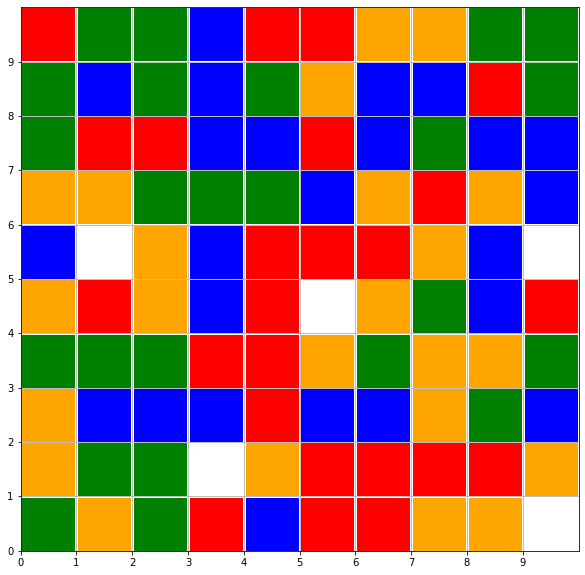

In [12]:
plot_city(sch)

In [13]:
sch2 = Schelling(width=20,height=20,empty_ratio=0.12,similarity_threshold=0.60,n_iterations=10,races=5)

In [14]:
populate(sch2)

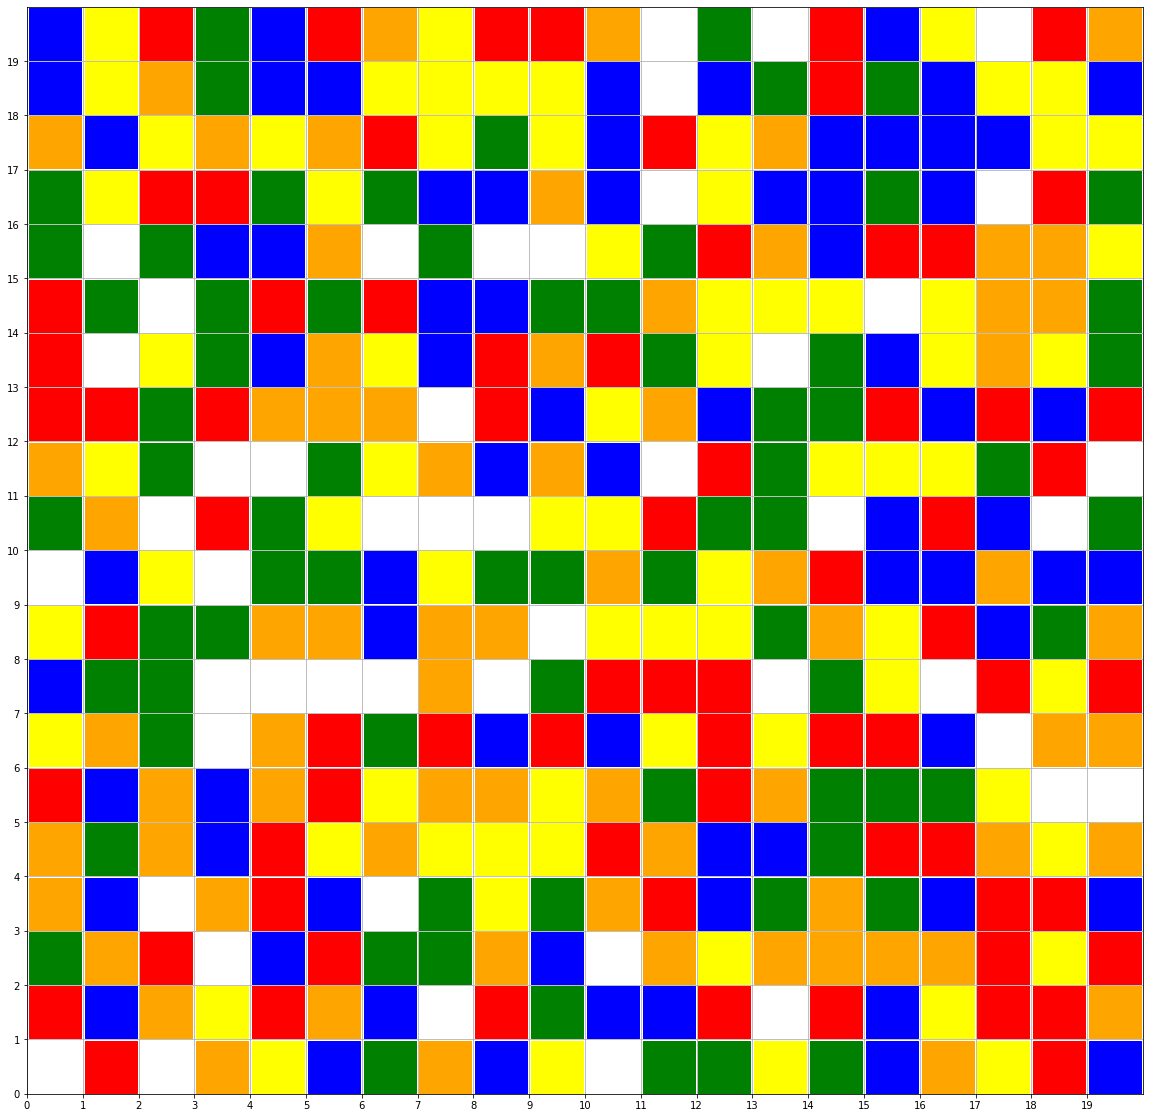

In [15]:
plot_city(sch2)

In [27]:
def is_unsatisfied(self, location):
        race = self.agents[location]
        locs = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]
        same_race = 0
        diff_race = 0
        x = location[0]-1
        y = location[1]-1
        for i in locs:
            nbor = []
            nbor.append(i[0] + x)
            nbor.append(i[1] + y)
            nbor_tup = tuple(nbor)
            if nbor_tup in self.agents:
                if self.agents[nbor_tup] == race:
                    same_race += 1
                else:
                    diff_race += 1
        if same_race == diff_race == 0:
            return False
        elif same_race/(same_race + diff_race) < self.similarity_threshold:
            return True
        else:
            return False  

In [28]:
is_unsatisfied(sch,(5,6))

True

In [29]:
is_unsatisfied(sch,(8,4))

True

In [30]:
def update(self):
    for key, value in self.agents:
        if is_unsatisfied(self, key) == True:
            random.shuffle(self.empty_houses)
            self.new_house = choice(self.empty_houses)
            self.agents[self.new_house]= value
            self.empty_houses.append(key)
            del self.agents[key]
            self.empty_houses.remove(self.new_house)

In [31]:
is_unsatisfied(sch,(5,6)) == True

True

In [26]:
update(sch)

KeyError: 3